In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df = df[~pd.to_numeric(df.TotalCharges,errors='coerce').isna()]
# df1 = df[df.TotalCharges != " "]

In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
tenure_churn_yes = df[df.Churn == "Yes"]['tenure']
tenure_churn_no = df[df.Churn == "No"]['tenure']

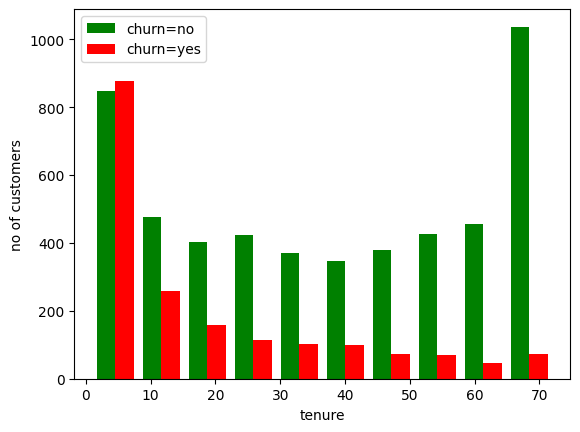

In [11]:
plt.hist([tenure_churn_no, tenure_churn_yes],color=['green','red'],label=['churn=no','churn=yes'])
plt.xlabel('tenure')
plt.ylabel('no of customers')
plt.legend()

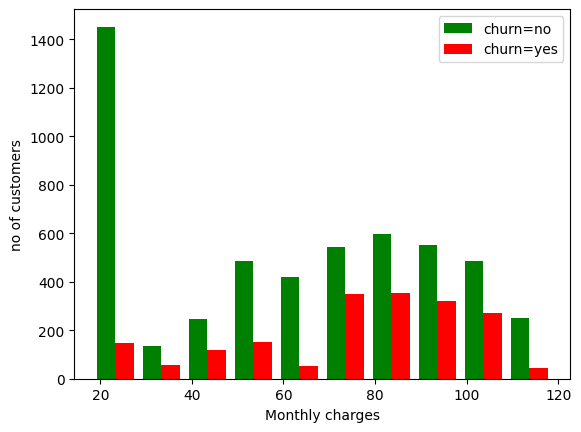

In [12]:
mc_churn_yes = df[df.Churn == "Yes"]['MonthlyCharges']
mc_churn_no = df[df.Churn == "No"]['MonthlyCharges']

plt.hist([mc_churn_no, mc_churn_yes],color=['green','red'],label=['churn=no','churn=yes'])
plt.xlabel('Monthly charges')
plt.ylabel('no of customers')
plt.legend()

In [13]:
def unique_vals(df):    
    for column in df:
        # if df[column].dtypes == "object":
            # if df[column].unique().size == 3:
        print(f"{column} : {df[column].unique()}")

In [14]:
unique_vals(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [15]:
df1 = df.copy()

df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df1['MultipleLines'] = df1['MultipleLines'].replace({'No phone service' : 'No'})
df1['OnlineSecurity'] = df1['OnlineSecurity'].replace({'No internet service' : 'No'})
df1['OnlineBackup'] = df1['OnlineBackup'].replace({'No internet service' : 'No'})
df1['DeviceProtection'] = df1['DeviceProtection'].replace({'No internet service' : 'No'})
df1['TechSupport'] = df1['TechSupport'].replace({'No internet service' : 'No'})
df1['StreamingTV'] = df1['StreamingTV'].replace({'No internet service' : 'No'})
df1['StreamingMovies'] = df1['StreamingMovies'].replace({'No internet service' : 'No'})

In [17]:
unique_vals(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [18]:
yes_no_list = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling' ]

for col in yes_no_list:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17064\895636274.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0},inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17064\895636274.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1, 'N

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df1.gender.replace({'Female':1, 'Male':0},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17064\3035418721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({'Female':1, 'Male':0},inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17064\3035418721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.gender.replace({

In [21]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [24]:
for column in df2:
    if df2[column].dtype =='object':
        print(column)

InternetService
Contract
PaymentMethod
Churn


In [25]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No


In [23]:
df2 = df1

In [26]:
class InternetServiceEncoder(TransformerMixin, BaseEstimator):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder_IS = OneHotEncoder()
        internet_service_encoded = encoder_IS.fit_transform(X[['InternetService']]).toarray().T
        column_names = ['DSL', 'Fiber optic', 'No']  
        for i in range(len(column_names)):
            X[column_names[i]] = internet_service_encoded[i]
        X.drop('InternetService',inplace=True,axis=1)
        return X
        

class Contract_encoder(TransformerMixin, BaseEstimator):
    def fit(self,X,y=None):
        return self
        
    def transform(self,X):
        encoder_C = OneHotEncoder()
        contract_encoded = encoder_C.fit_transform(X[['Contract']]).toarray().T
        column_names = ['Month-to-month', 'One year', 'Two year']
        for i in range(len(column_names)):
            X[column_names[i]] = contract_encoded[i]
        X.drop('Contract',inplace=True,axis=1)
        return X


class PaymentMethodEncder(TransformerMixin, BaseEstimator):
    def fit(self,X,y=None):
        return self
        
    def transform(self,X):
        encoder_P = OneHotEncoder()
        payment_method_encoded = encoder_P.fit_transform(X[['PaymentMethod']]).toarray().T
        column_names = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)']
        for i in range(len(column_names)):
            X[column_names[i]] = payment_method_encoded[i]
        X.drop('PaymentMethod',inplace=True,axis=1)
        return X


internet= InternetServiceEncoder()
internet.fit_transform(df2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,No,1.0,0.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,No,1.0,0.0,0.0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,1.0,0.0,0.0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,1.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,No,1.0,0.0,0.0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,No,0.0,1.0,0.0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,No,1.0,0.0,0.0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,Yes,0.0,1.0,0.0


In [27]:
contract = Contract_encoder()
contract.fit_transform(df2)

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No,Month-to-month,One year,Two year
0,1,0,1,0,1,0,0,0,1,0,...,Electronic check,29.85,29.85,No,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,Mailed check,56.95,1889.50,No,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,2,1,0,1,1,0,...,Mailed check,53.85,108.15,Yes,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,0,1,0,1,...,Bank transfer (automatic),42.30,1840.75,No,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,Electronic check,70.70,151.65,Yes,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
df2['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
payment_method = PaymentMethodEncder()
payment_method.fit_transform(df2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,1,0,1,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,1,0,1,1,72,1,1,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1,0,1,1,11,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0,1,1,0,4,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df2["Churn"] = df2['Churn'].replace({'Yes':1,'No':0})

C:\Users\User\AppData\Local\Temp\ipykernel_17064\2792060792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Churn"] = df2['Churn'].replace({'Yes':1,'No':0})


In [32]:
df2.dtypes

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int64
DSL                          float64
Fiber optic                  float64
No                           float64
Month-to-month               float64
One year                     float64
Two year                     float64
Electronic check             float64
Mailed check                 float64
Bank transfer (automatic)    float64
Credit card (automatic)      float64
d

In [33]:
columns_to_scale = ['MonthlyCharges','TotalCharges','tenure']
scaler = MinMaxScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,1,0,1,0,0.000000,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0.619718,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

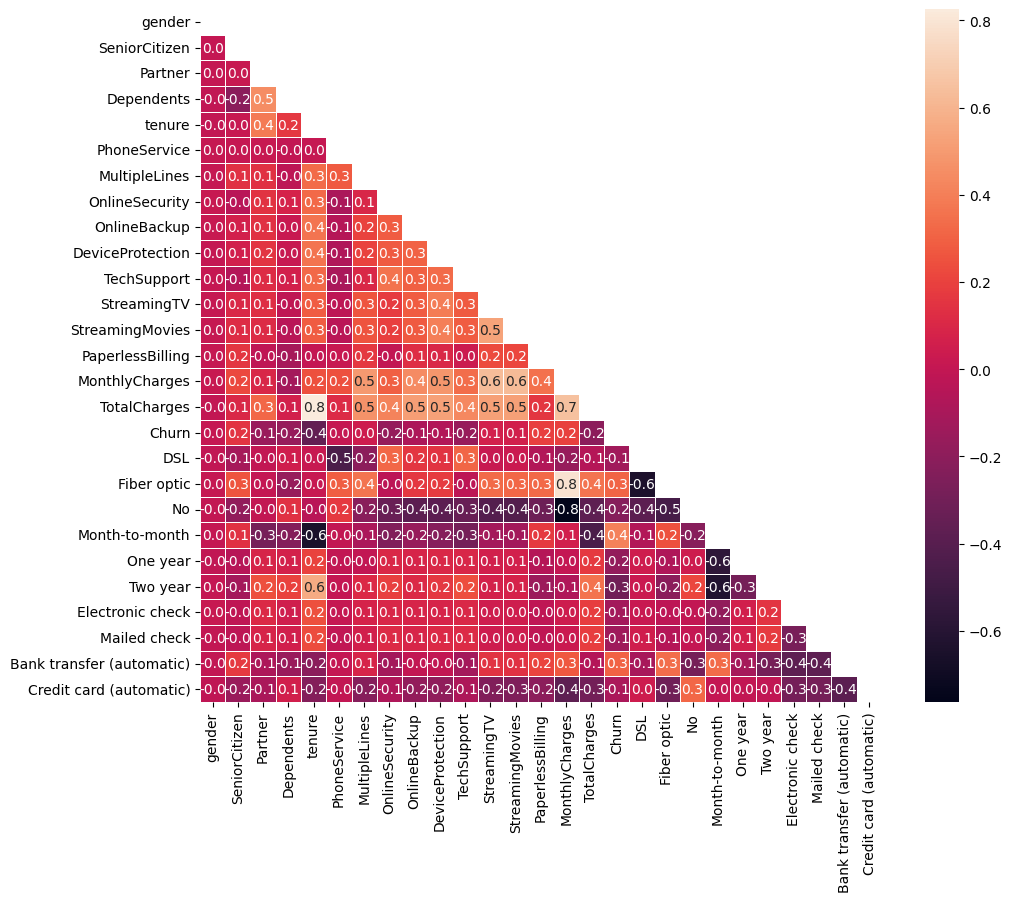

In [34]:
correlation_matrx = df2.corr()
mask = np.triu(np.ones_like(correlation_matrx))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation_matrx, mask=mask, annot=True, fmt=".1f", linewidths=.5, ax=ax)

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [37]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
X_train.shape

(5625, 26)

In [61]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
             metrics=['accuracy'])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.fit(X_train,y_train,epochs=75)

Epoch 1/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8235 - loss: 0.3781
Epoch 2/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8248 - loss: 0.3810
Epoch 3/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8295 - loss: 0.3741
Epoch 4/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8238 - loss: 0.3811
Epoch 5/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8150 - loss: 0.3832
Epoch 6/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8239 - loss: 0.3764
Epoch 7/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8169 - loss: 0.3875
Epoch 8/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8202 - loss: 0.3838
Epoch 9/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8289 - loss: 0.3691
Epoch 10/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8190 - loss: 0.3728
Epoch 11/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8265 - loss: 0.3722
Epoch 12/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [64]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7659 - loss: 0.4894


[0.496799498796463, 0.7640369534492493]

In [65]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [72]:
predictions_array = []

for i in yp:
    if i > 0.5 : 
        predictions_array.append(1)
    else : 
        predictions_array.append(0)

print(predictions_array[:10])

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [73]:
y_test[:10]

6036    0
1204    0
5717    0
1739    1
4981    1
3351    1
3040    1
5212    0
4878    0
1095    0
Name: Churn, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
con_matrix = confusion_matrix(y_pred=predictions_array, y_true=y_test)

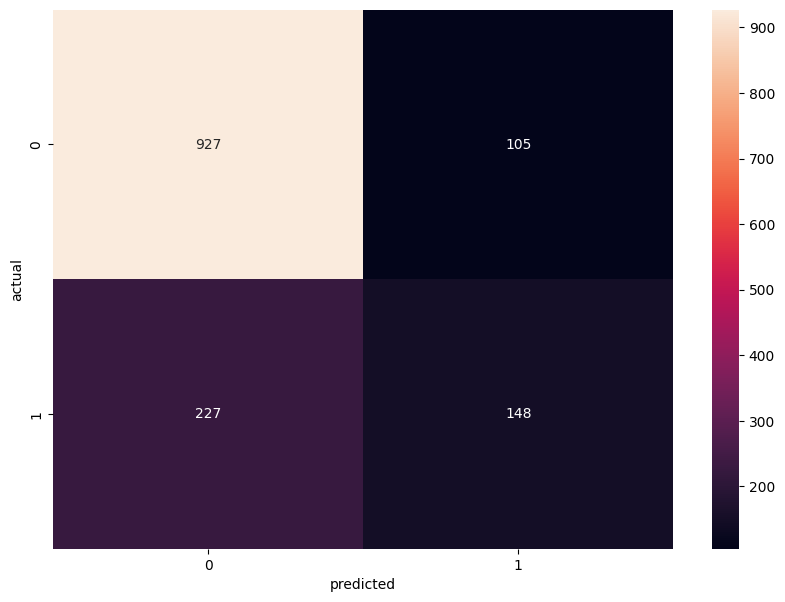

In [101]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.savefig('Confusion matrix.png')

In [99]:
print(classification_report(y_test, predictions_array))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1032
           1       0.58      0.39      0.47       375

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.75      0.76      0.75      1407

